<a href="https://colab.research.google.com/github/khadijabendib/IoT-IA/blob/main/Clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans


In [84]:
df = pd.read_csv("L3IA.csv",sep=';',decimal=',')
print(df.head())
df['DateTime'] = pd.to_datetime(df['DateTime'],unit='s')
df

     DateTime  CO2  Temperature  Humidity
0  1647840265  427    19.799999        32
1  1647840874  412    19.799999        32
2  1647841034  408    19.799999        32
3  1647841477  408    19.799999        32
4  1647841990  399    19.799999        31


,DateTime,CO2,Temperature,Humidity
0,2022-03-21 05:24:25,427,19.799999,32
1,2022-03-21 05:34:34,412,19.799999,32
2,2022-03-21 05:37:14,408,19.799999,32
3,2022-03-21 05:44:37,408,19.799999,32
4,2022-03-21 05:53:10,399,19.799999,31
...,...,...,...,...
3147,2022-03-26 23:22:41,435,21.200001,31
3148,2022-03-26 23:32:43,430,21.200001,31
3149,2022-03-26 23:38:13,427,21.200001,31
3150,2022-03-26 23:42:46,427,21.200001,31


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


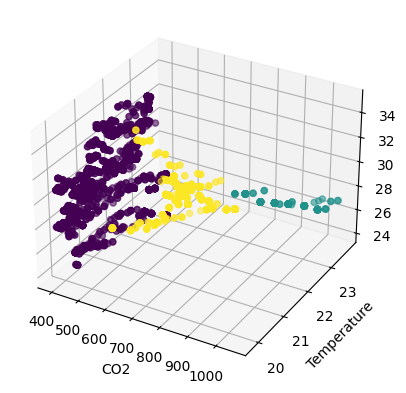

In [76]:
# Charger les données à partir du fichier CSV
df = pd.read_csv("L3IA.csv",sep=";",decimal=',')

# Créer un sous-ensemble de données avec les variables CO2, température et humidité
X = df[['CO2', 'Temperature', 'Humidity']].values

# Créer une instance de l'algorithme K-means avec le nombre de clusters souhaité
kmeans = KMeans(n_clusters=3)

# Appliquer l'algorithme K-means sur les données
kmeans.fit(X)

# Obtenir les étiquettes de cluster assignées à chaque exemple
labels = kmeans.labels_

# Ajouter les étiquettes de cluster comme colonne dans le DataFrame
df['Cluster'] = labels

# Visualiser les données en 3D avec les clusters colorés
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['CO2'], df['Temperature'], df['Humidity'], c=labels, cmap='viridis')
ax.set_xlabel('CO2')
ax.set_ylabel('Temperature')
ax.set_zlabel('Humidity')
plt.show()

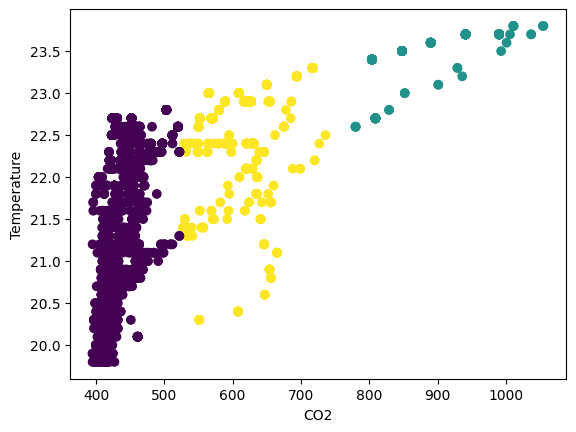

In [77]:
# Visualiser les données en 2D avec les clusters colorés (CO2 vs. Temperature)
plt.scatter(df['CO2'], df['Temperature'], c=labels, cmap='viridis')
plt.xlabel('CO2')
plt.ylabel('Temperature')
plt.show()

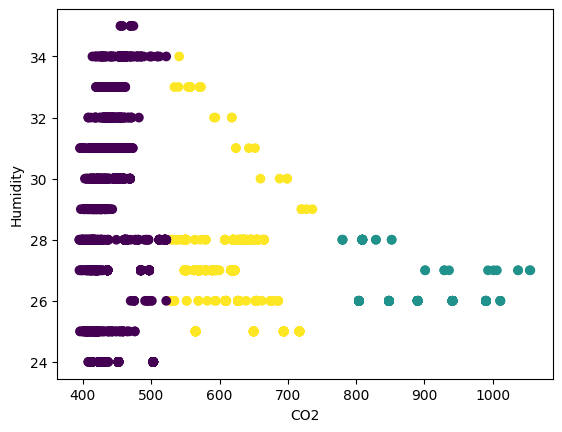

In [78]:
# Visualiser les données en 2D avec les clusters colorés (CO2 vs. Humidity)
plt.scatter(df['CO2'], df['Humidity'], c=labels, cmap='viridis')
plt.xlabel('CO2')
plt.ylabel('Humidity')
plt.show()


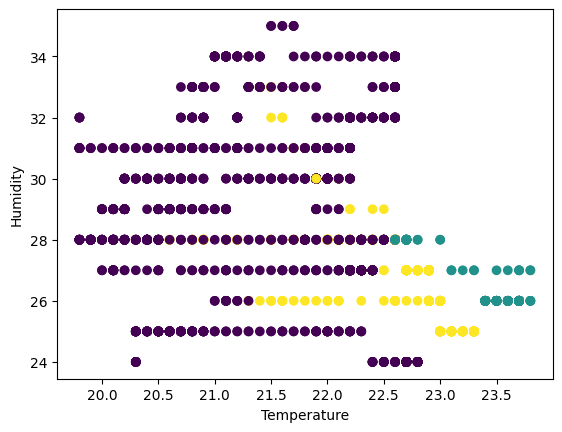

In [79]:
# Visualiser les données en 2D avec les clusters colorés (Temperature vs. Humidity)
plt.scatter(df['Temperature'], df['Humidity'], c=labels, cmap='viridis')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.show()

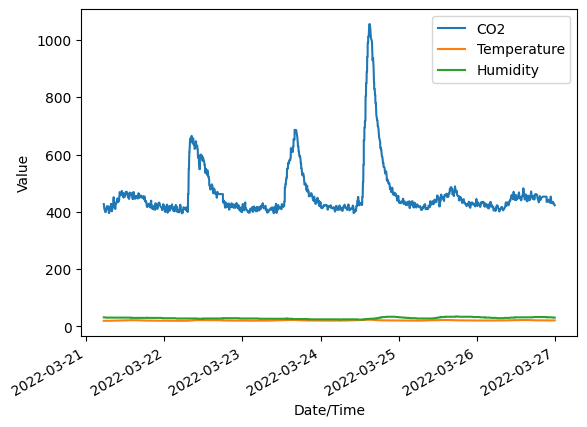

In [83]:
# Vérifier s'il y a des cycles sur les séries temporelles de mesures
# En supposant que la colonne "DateTime" contient des données de type datetime
# Vous pouvez ajuster cette partie en fonction du format réel de vos données de date/heure
df['DateTime'] = pd.to_datetime(df['DateTime'])
df = df.set_index('DateTime')
df[['CO2', 'Temperature', 'Humidity']].plot()
plt.xlabel('Date/Time')
plt.ylabel('Value')
plt.show()

In [61]:
print(df.columns)

Index(['DateTime;CO2;Temperature;Humidity'], dtype='object')


In [85]:
# Importer les bibliothèques nécessaires
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Charger les données
df = pd.read_csv("L3IA.csv", sep=';', decimal=',')
# Préparer les données pour l'apprentissage
X = df[['CO2', 'Temperature', 'Humidity']].values
y = df['Label'].values

# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer un modèle KNN avec k=5 (5 voisins)
knn = KNeighborsClassifier(n_neighbors=5)

# Entraîner le modèle sur les données d'apprentissage
knn.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred = knn.predict(X_test)

# Évaluer les performances du modèle en calculant l'exactitude (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print("Exactitude (accuracy) du modèle KNN : {:.2f}".format(accuracy))

KeyError: ignored